# **Business Case:** LoanTap - Linear Regression 

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('pastel')
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('Credit.csv', index_col='Unnamed: 0')
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


# <u>***1. Problem Statement and EDA***

## **Problem Statement**

- LoanTap aims to leverage a dataset comprising diverse customer attributes to develop a robust predictive model capable of accurately determining the credit rating of customers.

- This predictive model holds immense value for LoanTap and other financial institutions as it allows them to mitigate the risk of defaults and make precise evaluations of customer creditworthiness.

- By utilizing this model, LoanTap can make informed decisions concerning credit approvals, loan terms, and interest rates, thus enhancing their ability to offer appropriate financial solutions to customers while maintaining a secure lending portfolio.

## **Observations on Dataset**

In [4]:
df.describe(include='all')

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400,400,400,400.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Female,No,Yes,Caucasian,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,207,360,245,199,NaN
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,NaN,NaN,NaN,NaN,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,NaN,NaN,NaN,NaN,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,NaN,NaN,NaN,NaN,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,NaN,NaN,NaN,NaN,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,NaN,NaN,NaN,NaN,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,NaN,NaN,NaN,NaN,863.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [6]:
df.shape

(400, 11)

## **Univariate Analysis**

### **Feature: Income**

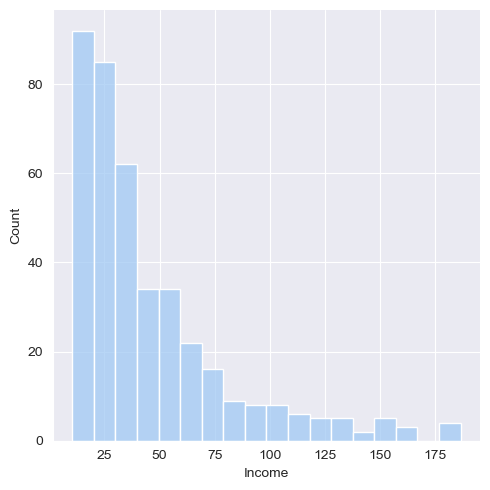

In [7]:
sns.displot(df['Income']);

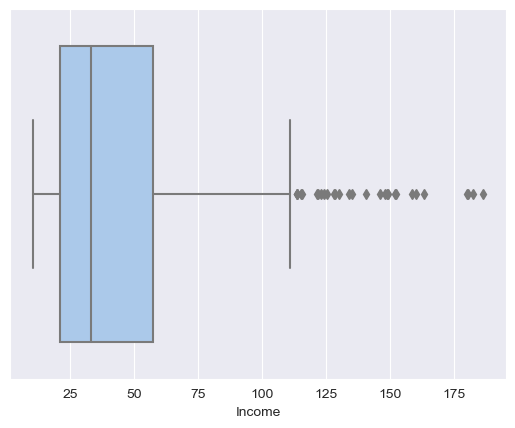

In [8]:
sns.boxplot(data = df, x='Income');

### **Feature: Limit**

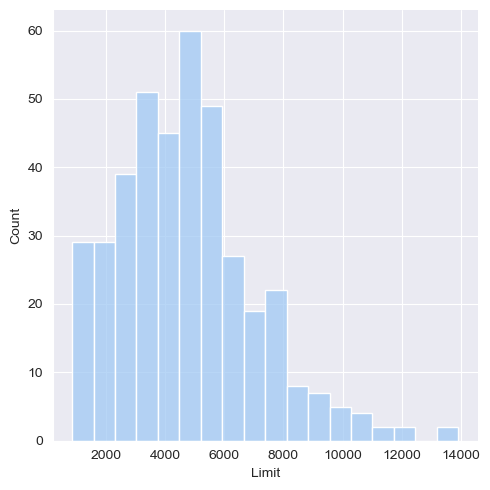

In [9]:
sns.displot(data = df, x='Limit');

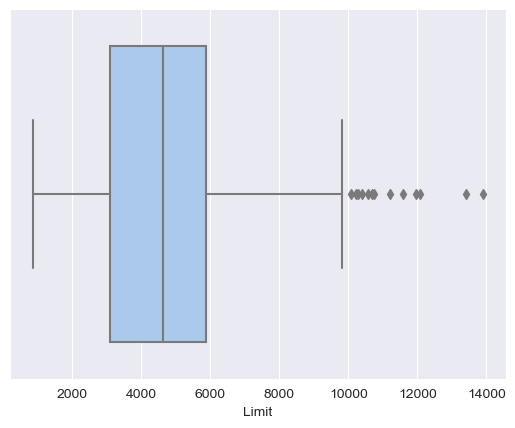

In [10]:
sns.boxplot(data = df, x='Limit');

### **Feature: Rating**

In [11]:
df['Rating'].nunique()

283

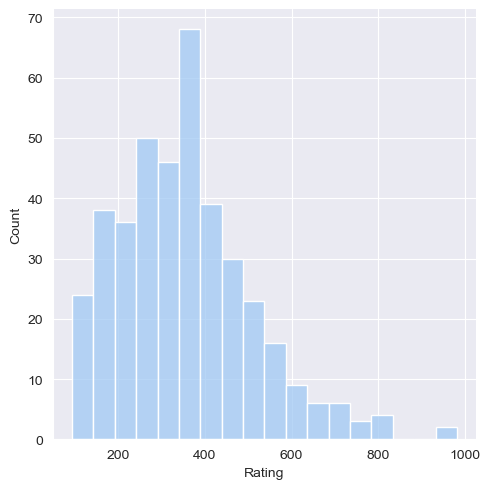

In [12]:
sns.displot(data = df, x='Rating');

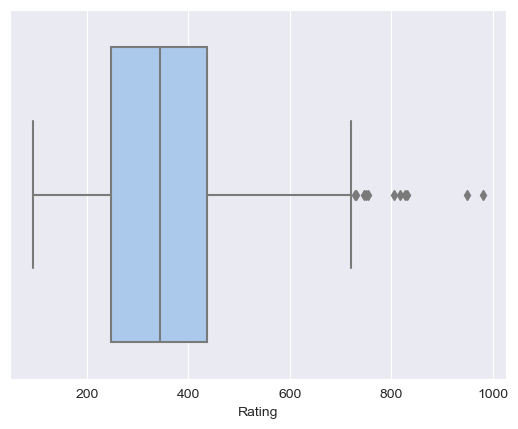

In [13]:
sns.boxplot(data = df, x='Rating');

### **Feature: Cards**

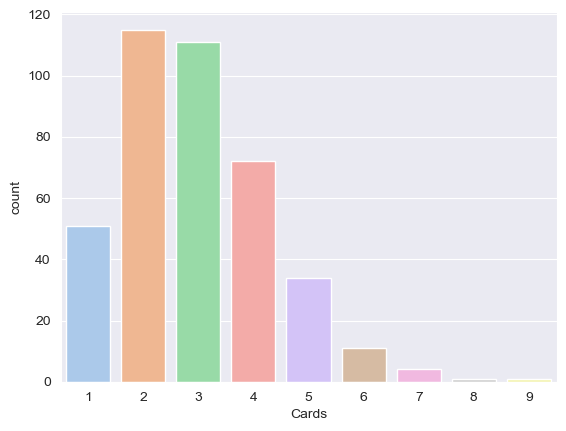

In [14]:
sns.countplot(data = df, x='Cards');

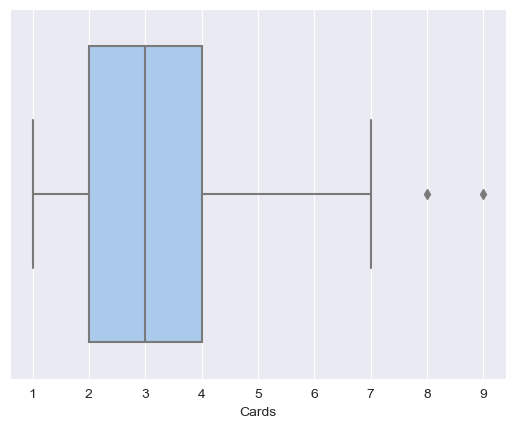

In [15]:
sns.boxplot(data = df, x='Cards');

### **Feature: Age**

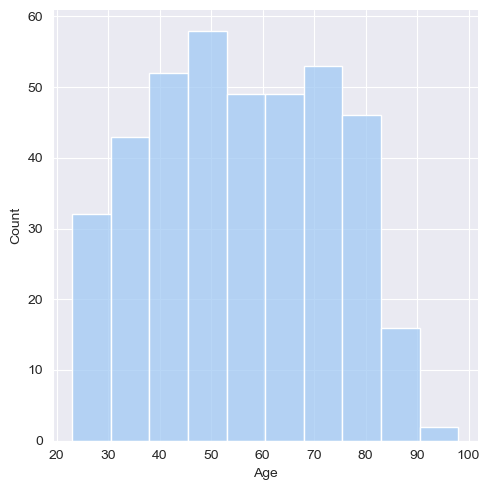

In [16]:
sns.displot(data = df, x='Age');

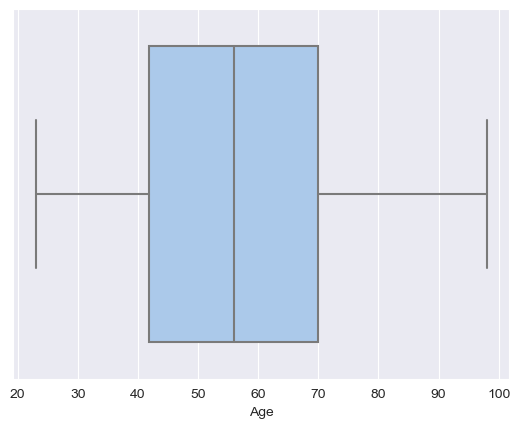

In [17]:
sns.boxplot(data = df, x='Age');

### **Feature: Education**

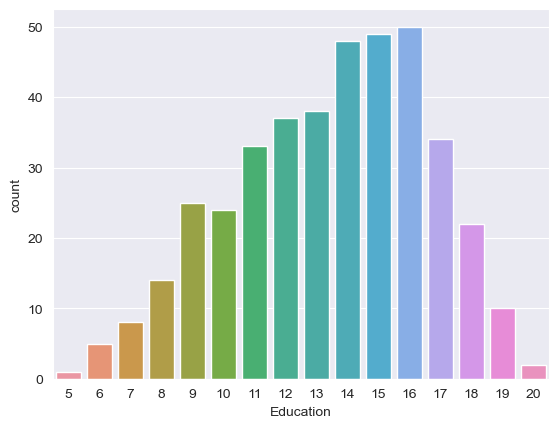

In [18]:
sns.countplot(data = df, x='Education');

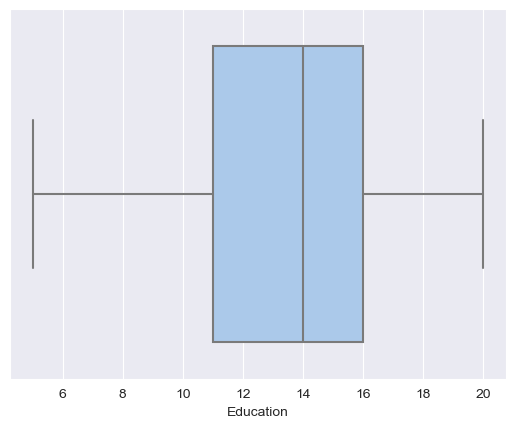

In [19]:
sns.boxplot(data = df, x='Education');

### **Feature: Gender**

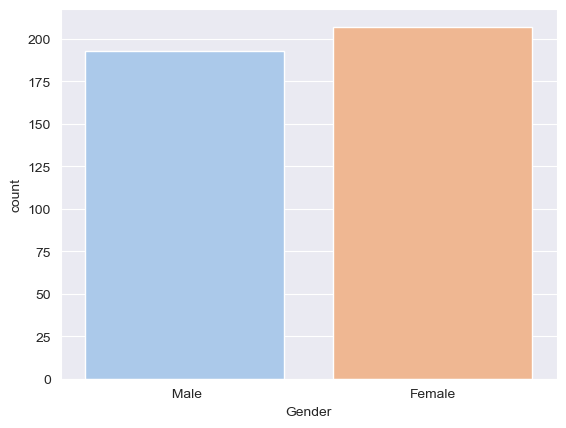

In [20]:
sns.countplot(data = df, x='Gender');

### **Feature: Student**

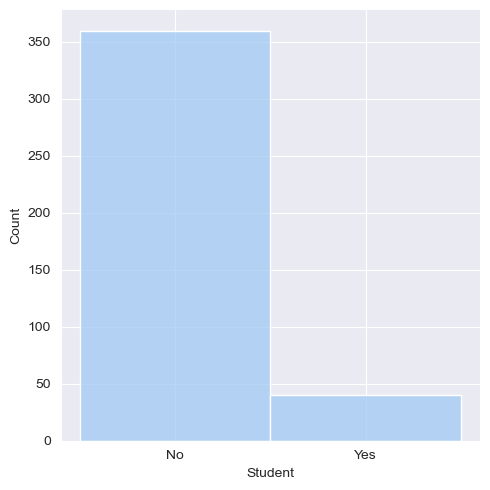

In [21]:
sns.displot(data = df, x='Student');

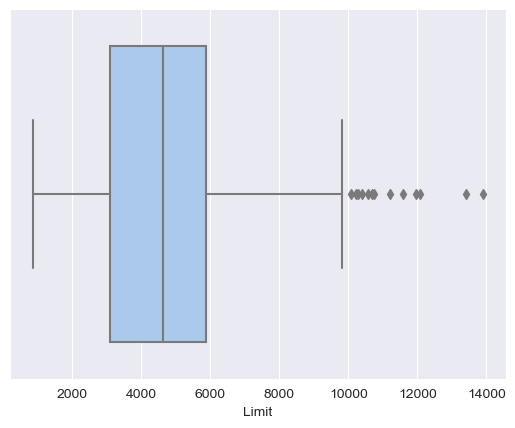

In [22]:
sns.boxplot(data = df, x='Limit');

### **Feature: Married**

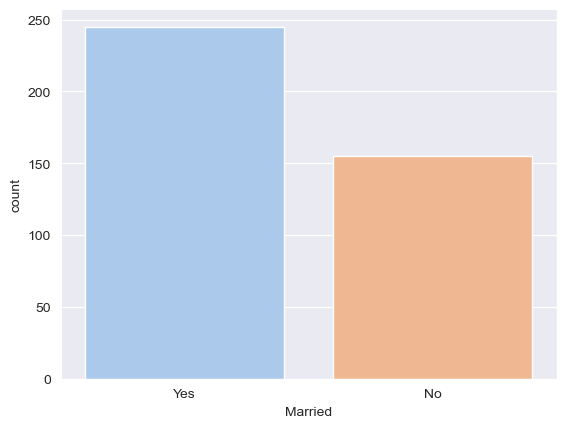

In [23]:
sns.countplot(data = df, x='Married');

### **Feature: Ethnicity**

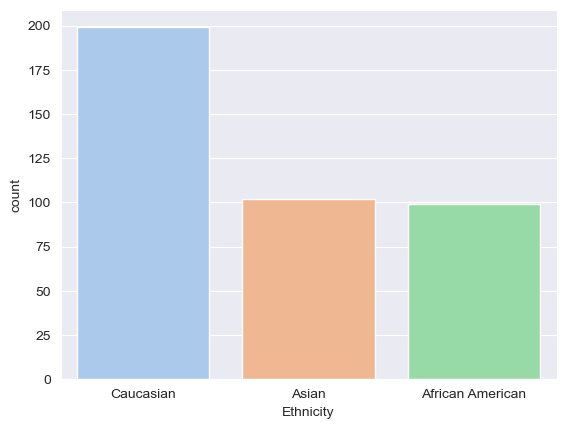

In [24]:
sns.countplot(data = df, x='Ethnicity');

### **Feature: Balance**

### **Multivariate Analysis**

In [25]:
categorical_features = ['Ethnicity', 'Married', 'Student', 'Gender']
numerical_features = ['Income', 'Limit', 'Cards', 'Age', 'Education', 'Balance']
target_feature = ['Rating']

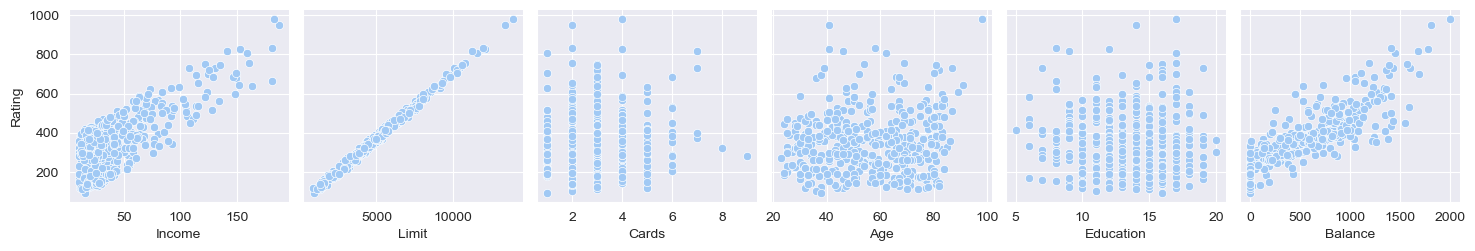

In [26]:
sns.pairplot(data=df, x_vars=numerical_features, y_vars=target_feature);

C:\Users\Ayush\AppData\Local\Temp\ipykernel_20980\2460615548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr());


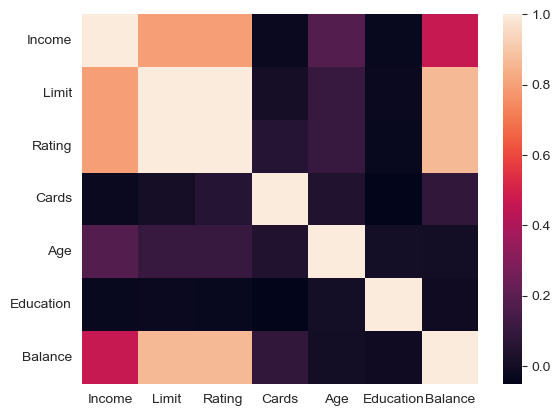

In [27]:
sns.heatmap(df.corr());

In [28]:
df.corr()

C:\Users\Ayush\AppData\Local\Temp\ipykernel_20980\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Income,Limit,Rating,Cards,Age,Education,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [29]:
df_ohe = pd.get_dummies(df, columns=categorical_features)
df_ohe.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Married_No,Married_Yes,Student_No,Student_Yes,Gender_ Male,Gender_Female
1,14.891,3606,283,2,34,11,333,0,0,1,0,1,1,0,1,0
2,106.025,6645,483,3,82,15,903,0,1,0,0,1,0,1,0,1
3,104.593,7075,514,4,71,11,580,0,1,0,1,0,1,0,1,0
4,148.924,9504,681,3,36,11,964,0,1,0,1,0,1,0,0,1
5,55.882,4897,357,2,68,16,331,0,0,1,0,1,1,0,1,0


In [30]:
df_ohe.corr()

,Income,Limit,Rating,Cards,Age,Education,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian,Married_No,Married_Yes,Student_No,Student_Yes,Gender_ Male,Gender_Female
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656,0.040132,-0.017137,-0.019701,-0.035652,0.035652,-0.019632,0.019632,0.010738,-0.010738
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697,0.036320,-0.032427,-0.003081,-0.031155,0.031155,0.006015,-0.006015,-0.009397,0.009397
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625,0.037598,-0.035999,-0.001070,-0.036751,0.036751,0.002028,-0.002028,-0.008885,0.008885
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456,0.000878,0.005591,-0.005631,0.009695,-0.009695,0.026164,-0.026164,0.022658,-0.022658
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835,0.061169,-0.059623,-0.000822,0.073136,-0.073136,0.029844,-0.029844,-0.004015,0.004015
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062,0.013827,0.029586,-0.037725,-0.048911,0.048911,-0.072085,0.072085,0.005049,-0.005049
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000,0.013720,-0.009812,-0.003288,0.005673,-0.005673,-0.259018,0.259018,-0.021474,0.021474
Ethnicity_African American,0.040132,0.036320,0.037598,0.000878,0.061169,0.013827,0.013720,1.000000,-0.335526,-0.570641,0.102707,-0.102707,-0.001931,0.001931,0.014288,-0.014288
Ethnicity_Asian,-0.017137,-0.032427,-0.035999,0.005591,-0.059623,0.029586,-0.009812,-0.335526,1.000000,-0.582131,-0.088595,0.088595,-0.053534,0.053534,-0.025425,0.025425
Ethnicity_Caucasian,-0.019701,-0.003081,-0.001070,-0.005631,-0.000822,-0.037725,-0.003288,-0.570641,-0.582131,1.000000,-0.011418,0.011418,0.048334,-0.048334,0.009831,-0.009831


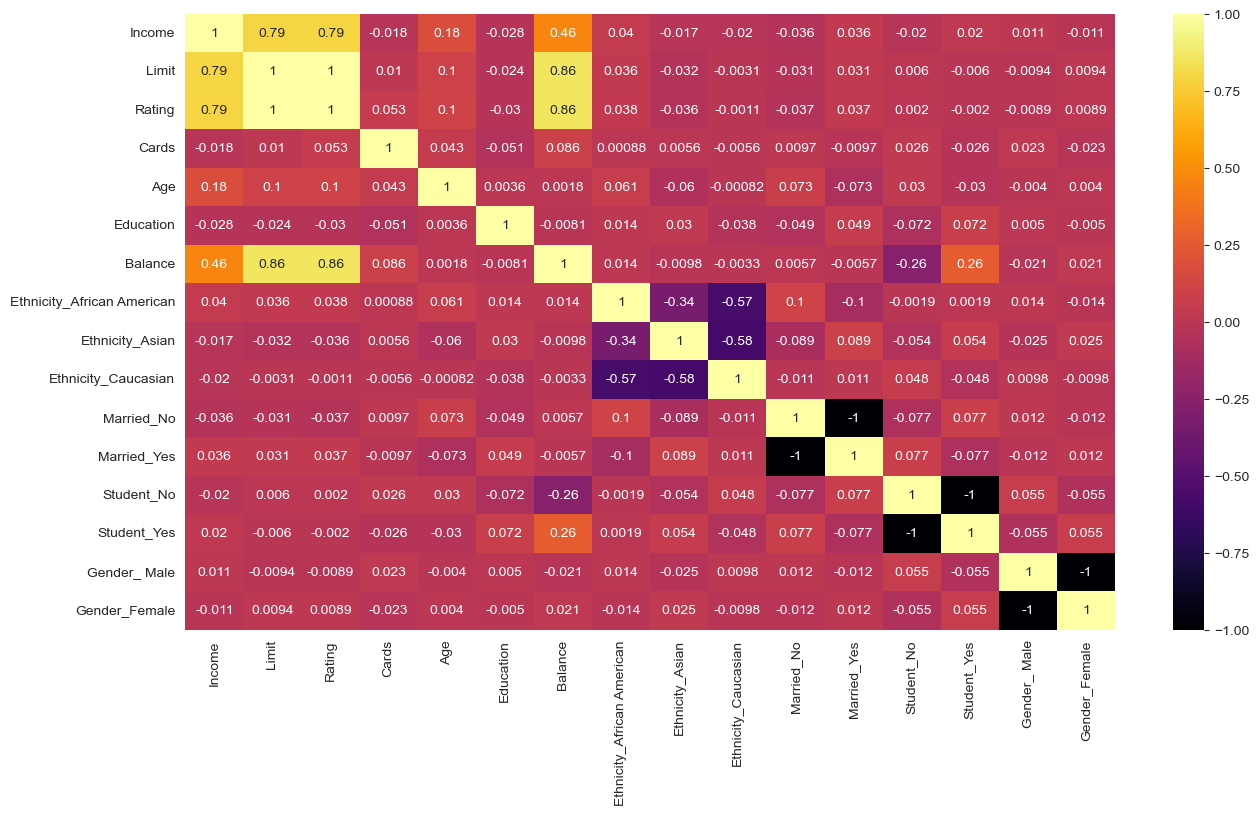

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df_ohe.corr(), annot=True, cmap='inferno');

* Income, Limit and Balance seems to have good correlation with our targe feature `Rating`. Other features don't seem to have an impact on `Rating`

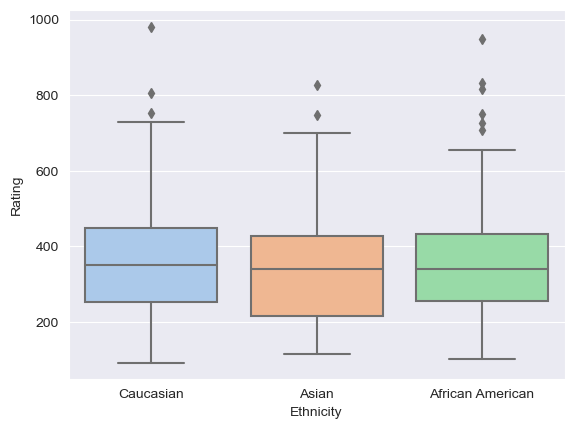

In [32]:
sns.boxplot(data = df, x='Ethnicity', y='Rating');

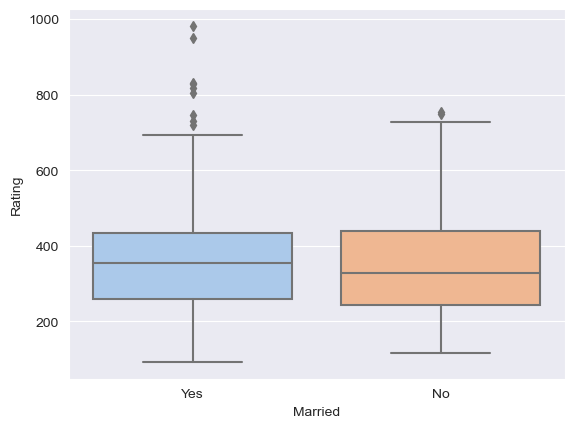

In [33]:
sns.boxplot(data = df, x='Married', y='Rating');

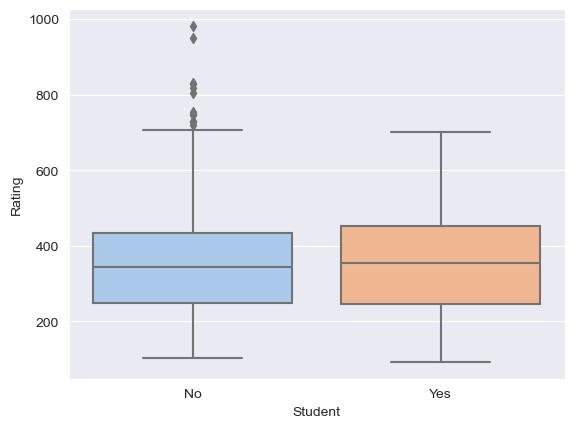

In [34]:
sns.boxplot(data = df, x='Student', y='Rating');

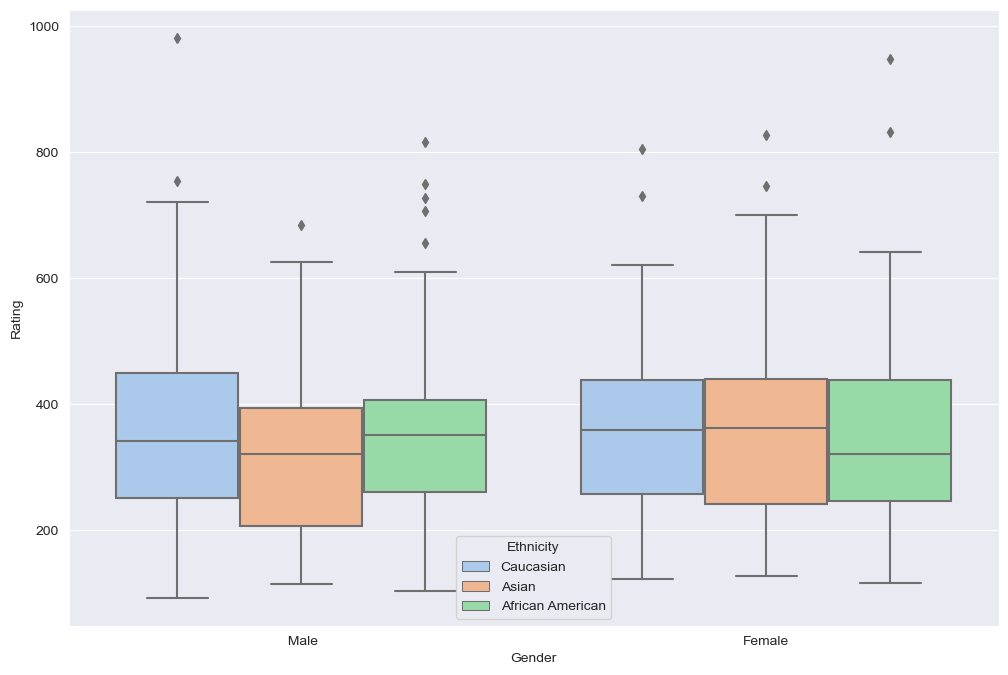

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(data = df, x='Gender', y='Rating', hue='Ethnicity');

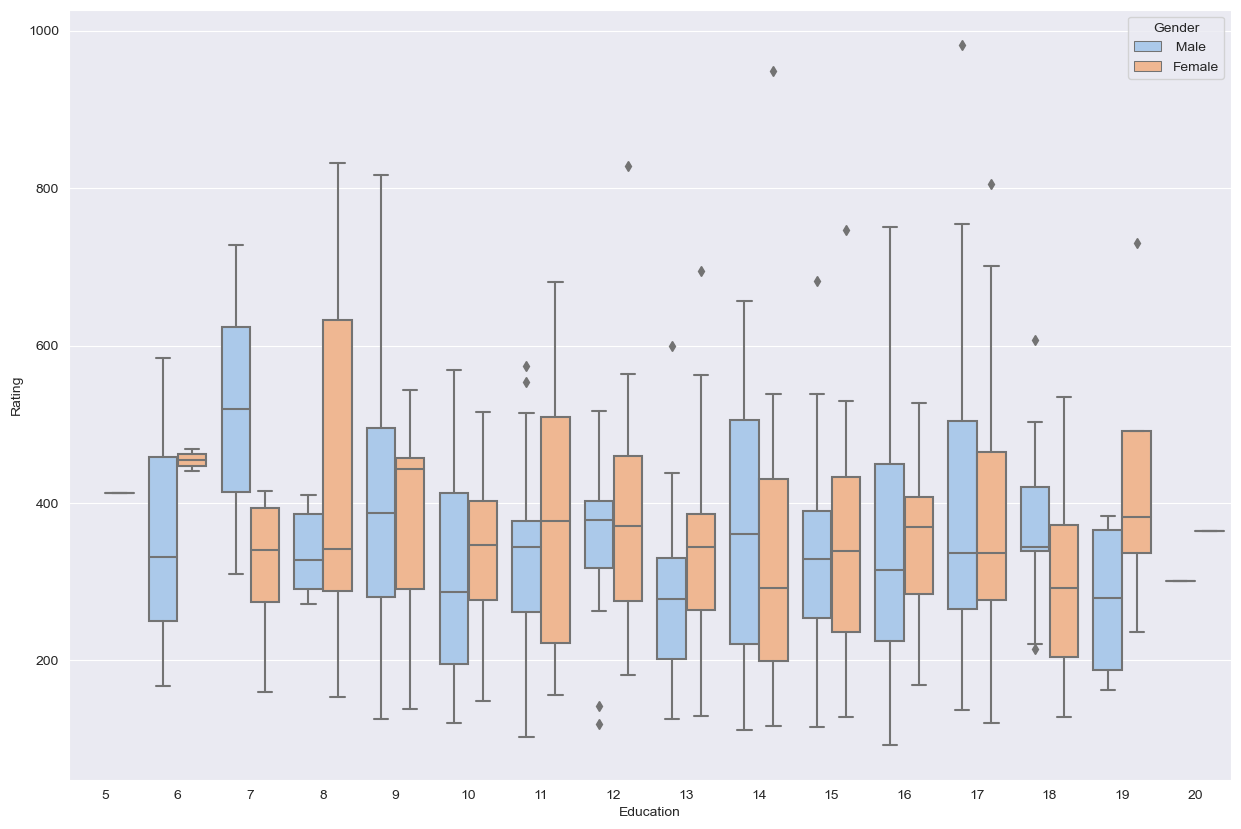

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(data = df, x='Education', y='Rating', hue='Gender');

**Comments**
- Among the numerical features only Income, Limit and Balance have shown a positive correlation with our target `Rating`.
- Other features dont have much impact positive or negative on target `Rating`. Which confirms that these features do not have a <u>linear relationship</u> with `Rating`

# <u>***2. Data Preprocessing***</u>

#### **Original Data**

##### **Multicollinearity Check**

- Checking features `Income`, `Limit` and `Balance` for multicollinearity

In [37]:
df[['Income', 'Limit', 'Balance']].corr()

,Income,Limit,Balance
Income,1.000000,0.792088,0.463656
Limit,0.792088,1.000000,0.861697
Balance,0.463656,0.861697,1.000000


In [38]:
df_1 = df[['Income', 'Limit', 'Balance']]

**Calculating VIF**

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = pd.DataFrame()
vif['Features'] = df_1.columns
vif['VIF'] = [variance_inflation_factor(df_1.values, i) for i in range(df_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Limit,23.42
2,Balance,8.92
0,Income,8.79


**Comments**
- These features(Income, Rating, Limit and Balance) are on different scales. Let's try to bring them on the same scale and check again.

##### **Linearity Check**

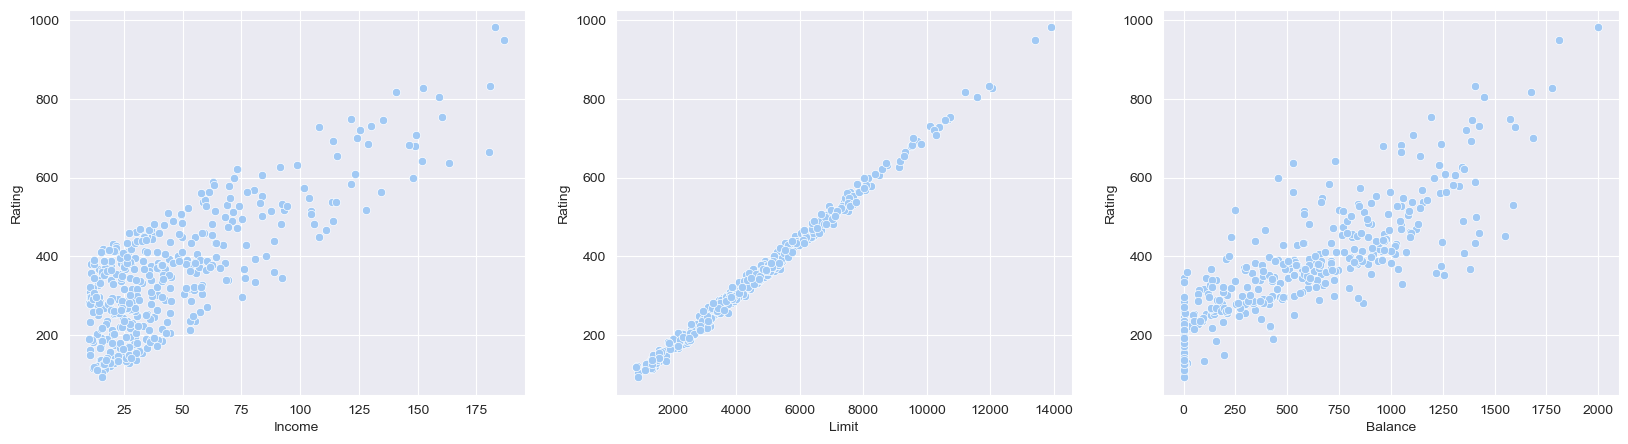

In [41]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df_1['Income'], y=df['Rating']);
plt.subplot(1,3,2)
sns.scatterplot(x=df_1['Limit'], y=df['Rating']);
plt.subplot(1,3,3)
sns.scatterplot(x=df_1['Balance'], y=df['Rating']);
plt.show()

- There is strong linearity with the target variable

##### **Checking distribution**

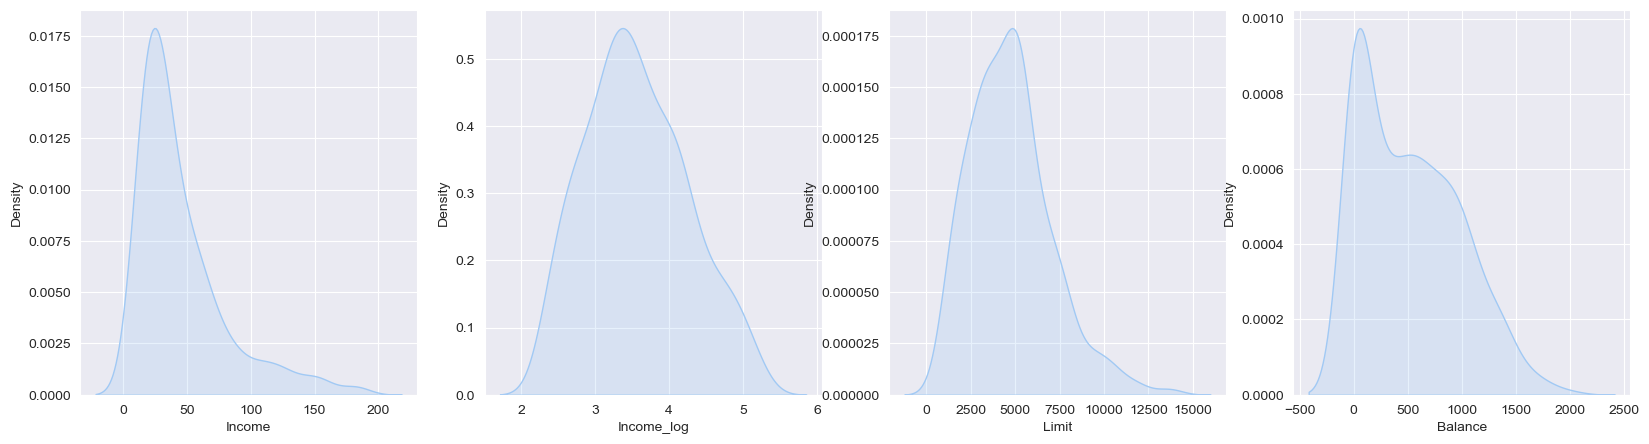

In [42]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.kdeplot(data=df, x='Income', fill=True);
plt.subplot(1,4,2)
sns.kdeplot(np.log(df['Income']), fill=True);
plt.xlabel('Income_log')
plt.subplot(1,4,3)
sns.kdeplot(data=df, x='Limit', fill=True);
plt.subplot(1,4,4)
sns.kdeplot(data=df, x='Balance', fill=True);

- Log of Income seems to be normally distributed. Let's create a new feature

- There were a lot entries with 0 balance, let's try to see dsitribution of data with Balance > 0

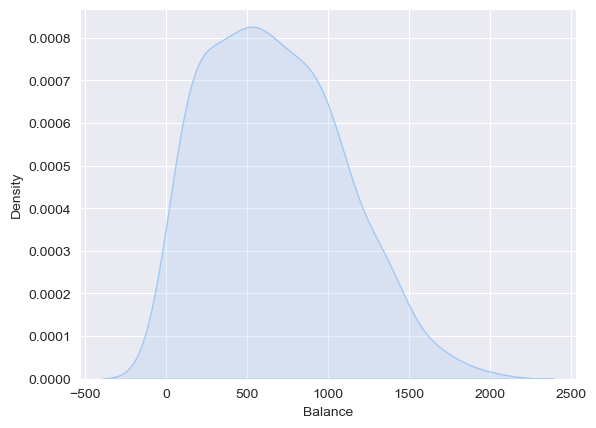

In [43]:
sns.kdeplot(df[df['Balance']>0]['Balance'], fill=True);

- It turns out that Balance is normally distributed for people with Balance > 0.
- Let's check the rating of people with 0 balance

##### Analyzing the Balance feature

In [44]:
(len(df[df['Balance']==0])/df.shape[0])*100

22.5

In [45]:
len(df[df['Balance']==0])

90

- 22.5% of people in our dataset have 0 Balance

In [46]:
df.loc[df['Balance']==0, ['Balance', 'Rating']]['Rating'].mean(), df.loc[df['Balance']==0, ['Balance', 'Rating']]['Rating'].max(), df.loc[df['Balance']==0, ['Balance', 'Rating']]['Rating'].min()

(182.33333333333334, 344, 93)

- Limit and Balance also seem to be normally distributed

- Let's try `Standardizing` these features

#### **Standardization**

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
df_standardized = df[['Income', 'Limit', 'Balance']].copy()
df_standardized.head(2)

,Income,Limit,Balance
1,14.891,3606,333
2,106.025,6645,903


In [49]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_standardized)

In [50]:
df_standardized = pd.DataFrame(df_standardized, columns=['Income', 'Limit', 'Balance'])
df_standardized.head()

,Income,Limit,Balance
0,-0.861583,-0.489999,-0.407277
1,1.727437,0.828261,0.834056
2,1.686756,1.014787,0.130634
3,2.946152,2.068440,0.966900
4,0.302928,0.070012,-0.411633


##### **Multicollinearity Check**

In [51]:
df_standardized.corr()

,Income,Limit,Balance
Income,1.000000,0.792088,0.463656
Limit,0.792088,1.000000,0.861697
Balance,0.463656,0.861697,1.000000


**Calculating VIF**

In [52]:
vif = pd.DataFrame()
vif['Features'] = df_standardized.columns
vif['VIF'] = [variance_inflation_factor(df_standardized.values, i) for i in range(df_standardized.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Limit,16.35
2,Balance,7.76
0,Income,5.36


##### **Linearity Check**

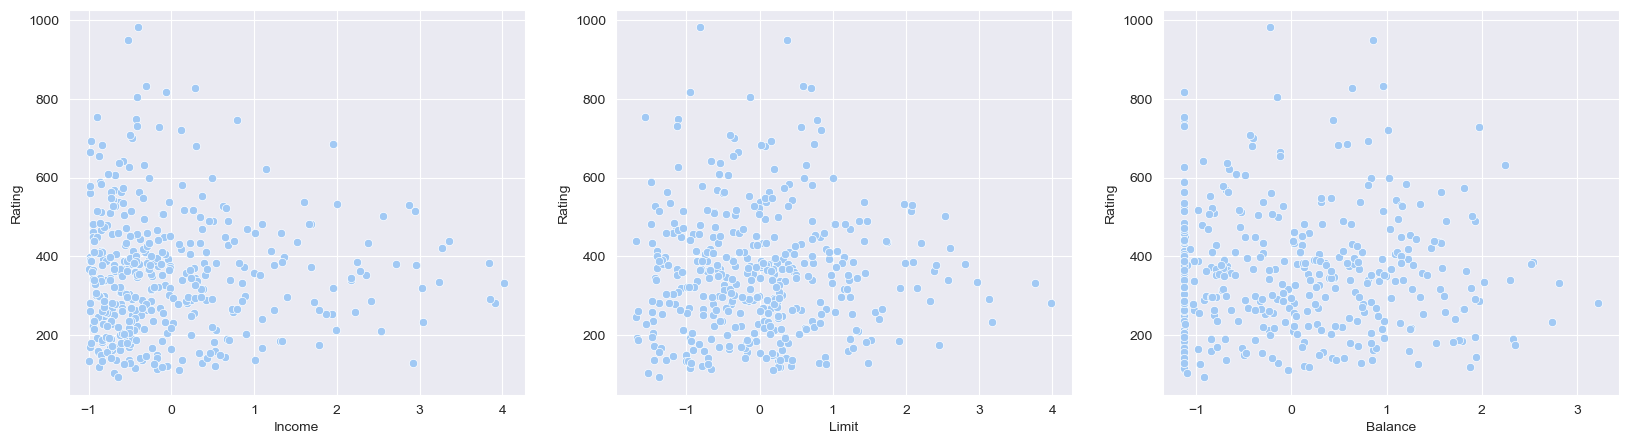

In [53]:
# sns.scatterplot(x=df1['Income'], y=df['Rating']);
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df_standardized['Income'], y=df['Rating']);
plt.subplot(1,3,2)
sns.scatterplot(x=df_standardized['Limit'], y=df['Rating']);
plt.subplot(1,3,3)
sns.scatterplot(x=df_standardized['Balance'], y=df['Rating']);
plt.show()

- Linearity assumption for standardized data has failed

#### **Normalisation**

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()
df_2 = df[['Income', 'Limit', 'Balance']]
df_normalized = scaler.fit_transform(df_2)

In [56]:
df_normalized = pd.DataFrame(df_normalized, columns = ['Income', 'Limit', 'Balance'])
df_normalized.head(2)

,Income,Limit,Balance
0,0.025737,0.210675,0.166583
1,0.542722,0.443406,0.451726


##### **Multicollinearity Check**

In [57]:
df_normalized.corr()

,Income,Limit,Balance
Income,1.000000,0.792088,0.463656
Limit,0.792088,1.000000,0.861697
Balance,0.463656,0.861697,1.000000


**Calculating VIF**

In [58]:
vif = pd.DataFrame()
vif['Features'] = df_normalized.columns
vif['VIF'] = [variance_inflation_factor(df_normalized.values, i) for i in range(df_normalized.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Limit,25.68
2,Balance,11.77
0,Income,7.19


##### **Linearity Check**

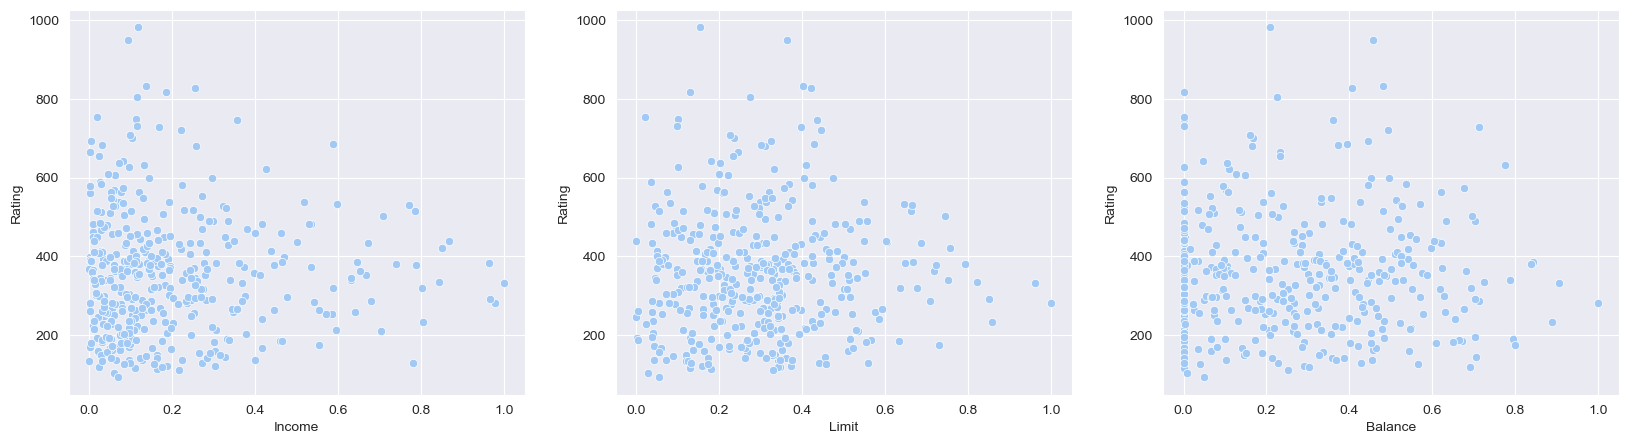

In [59]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df_normalized['Income'], y=df['Rating']);
plt.subplot(1,3,2)
sns.scatterplot(x=df_normalized['Limit'], y=df['Rating']);
plt.subplot(1,3,3)
sns.scatterplot(x=df_normalized['Balance'], y=df['Rating']);
plt.show()

- Linearity assumption for normalized data has failed

- No visible lienarity with the target variable

#### **Log-Transformed Data**

In [60]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


**Log Transformation**

In [61]:
df_3 = df[['Income', 'Limit', 'Balance']].copy()
for i in df_3.columns:
    df_3[i] = np.log(df_3[i])

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


##### **Multicollinearity Check**

In [62]:
df_3.corr()

,Income,Limit,Balance
Income,1.000000,0.650761,0.249399
Limit,0.650761,1.000000,0.744779
Balance,0.249399,0.744779,1.000000


In [63]:
vif = pd.DataFrame()
vif['Features'] = df_3.columns
vif['VIF'] = [variance_inflation_factor(df_3.values, i) for i in range(df_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Income,NaN
1,Limit,NaN
2,Balance,NaN


#### **Linearity Check**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


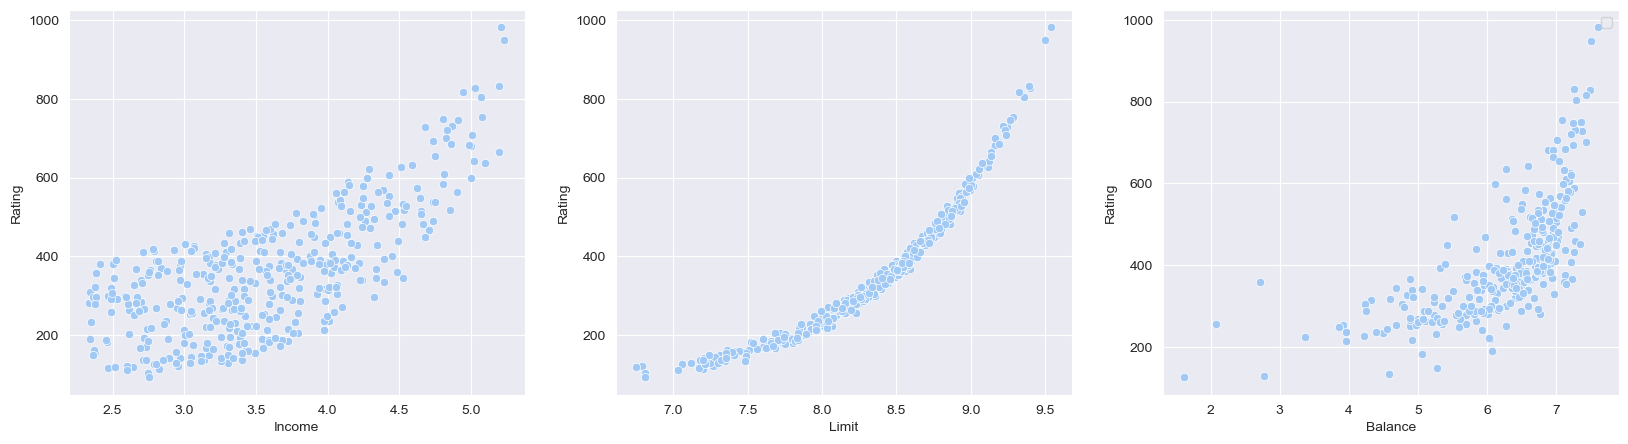

In [64]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df_3['Income'], y=df['Rating']);
plt.subplot(1,3,2)
sns.scatterplot(x=df_3['Limit'], y=df['Rating']);
plt.subplot(1,3,3)
sns.scatterplot(x=df_3['Balance'], y=df['Rating']);
plt.legend()


- Multicollinearity Assumption has failed for Log-Transformed data

**Comments**
- Let's use Income and Balance from original dataset without transformed values
- They do not violate Linearity assumption with the target feature
- Their VIF score is the lowest among other independent features
- We'll use `Income` and ` Balance` feature to build our model

# <u>***3. Model Building***</u>

In [65]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **Model-1**

### **A. Model Building**

##### **Multicollinearity Check**

- Checking features `Income`, `Balance` for multicollinearity

In [66]:
df[['Income', 'Balance']].corr()

,Income,Balance
Income,1.000000,0.463656
Balance,0.463656,1.000000


In [67]:
df_model = df[['Income', 'Balance',]]

**Calculating VIF**

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif = pd.DataFrame()
vif['Features'] = df_model.columns
vif['VIF'] = [variance_inflation_factor(df_model.values, i) for i in range(df_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Income,2.55
1,Balance,2.55


**Defining X and Y**

In [70]:
X = df[['Income', 'Balance']]
Y = df['Rating']

In [71]:
X.shape, Y.shape

((400, 2), (400,))

In [72]:
X_sm = sm.add_constant(X)


**Creating train and test data**

In [73]:
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Creating train and validation data**

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Training Model**

In [75]:
sm_model1 = sm.OLS(y_train, X_train).fit()
sm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2698.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          9.06e-200
Time:                        13:39:27   Log-Likelihood:                -1616.4
No. Observations:                 320   AIC:                             3239.
Df Residuals:                     317   BIC:                             3250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.4969      3.624     39.598      0.000     136.367     150.627
Income         2.1810      0.070     31.121      0.000       2.043       2.319
Balance        0.2164      0.005     41.229      0.000       0.206       0.227
==============================================================================
Omnibus:                       50.267   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.600
Skew:                          -1.142   Prob(JB):                     4.67e-16
Kurtosis:                       3.285   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Testing Model**

In [76]:
# Make predictions on the test data
y_pred = sm_model1.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model1.summary())

Mean Squared Error (MSE): 1393.8970368186547
R-squared (R²): 0.9148779950993275
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2698.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          9.06e-200
Time:                        13:39:27   Log-Likelihood:                -1616.4
No. Observations:                 320   AIC:                             3239.
Df Residuals:                     317   BIC:                             3250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

**Testing model with Validation data**

In [77]:
y_pred = sm_model1.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model1.summary())

Mean Squared Error (MSE): 1393.8970368186547
R-squared (R²): 0.9148779950993275
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     2698.
Date:                Wed, 02 Aug 2023   Prob (F-statistic):          9.06e-200
Time:                        13:39:27   Log-Likelihood:                -1616.4
No. Observations:                 320   AIC:                             3239.
Df Residuals:                     317   BIC:                             3250.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### **B. Verifying Assumptions**

**Heteroscedasticity**

In [78]:
errors = y_test - y_pred
y_pred

210    633.289534
281    377.028066
34     211.909622
211    217.582254
94     382.185955
          ...    
247    229.278669
228    393.897668
370    561.224888
177    195.950938
290    272.109652
Length: 80, dtype: float64

Text(0.5, 1.0, 'Predicted values vs Residuals')

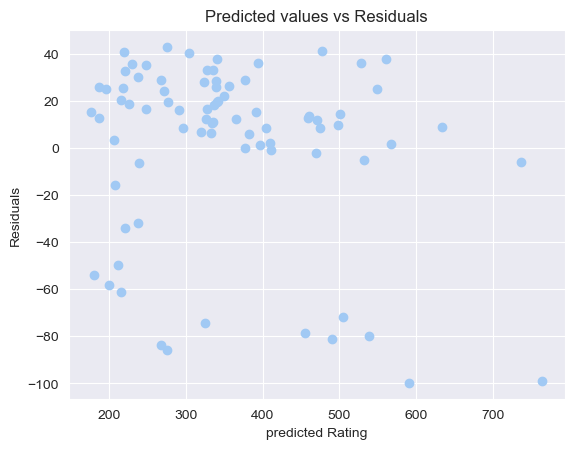

In [79]:
plt.scatter(y_pred,errors)
plt.xlabel("predicted Rating")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**Normality of Residuals**

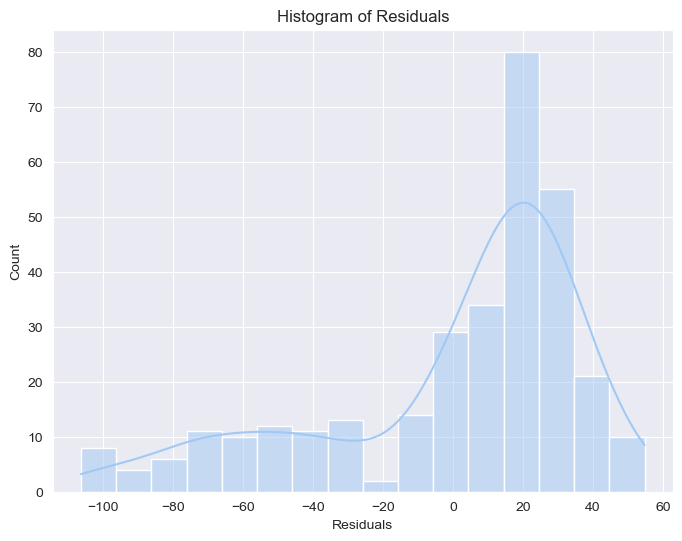

<Figure size 800x600 with 0 Axes>

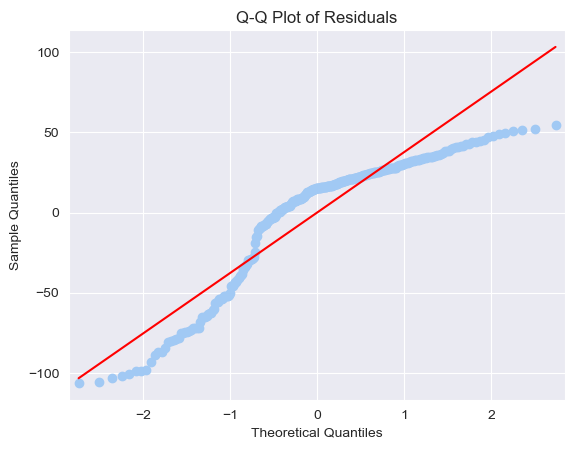

In [80]:
# Calculate residuals
residuals = sm_model1.resid

# Visualize residuals using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Visualize residuals using a Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [81]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality of residuals
stat, p_value = shapiro(residuals)

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check if the residuals are normally distributed based on the p-value
if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.8595960140228271
P-value: 2.034065978327661e-16
Residuals are not normally distributed.


- Normality of Residuals assumption is violated

### **C. Model Evaluation**

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have y_true (actual target values) and y_pred (predicted values) from your linear regression model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate the number of samples and number of predictors
n_samples, n_predictors = X.shape

# Calculate Adjusted R-squared (Adj R2)
adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1))

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)


Mean Squared Error (MSE): 1393.8970368186547
Root Mean Squared Error (RMSE): 37.33493051846561
Mean Absolute Error (MAE): 28.501815692792526
R-squared (R2): 0.9148779950993275
Adjusted R-squared (Adj R2): 0.9144491688781655


## **Model-2**

### **A. Model Building**

**Defining X and Y**

In [83]:
X = df[['Limit', 'Balance']]
Y = df['Rating']

In [84]:
X.shape, Y.shape

((400, 2), (400,))

In [85]:
X_sm = sm.add_constant(X)


**Creating train and test data**

In [86]:
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Creating train and validation data**

In [87]:
X_train, X_val, y_train, y_val = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Training Model**

In [88]:
sm_model2 = sm.OLS(y_train, X_train).fit()
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.636e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:28   Log-Likelihood:                -1259.9
No. Observations:                 320   AIC:                             2526.
Df Residuals:                     317   BIC:                             2537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4820      1.797     22.523      0.000      36.946      44.018
Limit          0.0658      0.001    107.796      0.000       0.065       0.067
Balance        0.0056      0.003      1.794      0.074      -0.001       0.012
==============================================================================
Omnibus:                        3.366   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.567
Skew:                           0.072   Prob(JB):                        0.277
Kurtosis:                       2.585   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Testing Model**

In [89]:
# Make predictions on the test data
y_pred = sm_model1.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model2.summary())

Mean Squared Error (MSE): 123402638.81103046
R-squared (R²): -7534.90813967348
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.636e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:28   Log-Likelihood:                -1259.9
No. Observations:                 320   AIC:                             2526.
Df Residuals:                     317   BIC:                             2537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

**Testing model with Validation data**

In [90]:
y_pred = sm_model2.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model2.summary())

Mean Squared Error (MSE): 118.75419444874964
R-squared (R²): 0.9927479613954032
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.636e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:28   Log-Likelihood:                -1259.9
No. Observations:                 320   AIC:                             2526.
Df Residuals:                     317   BIC:                             2537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### **B. Verifying Assumptions**

**Heteroscedasticity**

In [91]:
errors = y_test - y_pred
y_pred

210    647.351977
281    393.676179
34     160.895516
211    252.080577
94     403.519260
          ...    
247    252.989145
228    412.769030
370    575.741083
177    212.115721
290    300.404138
Length: 80, dtype: float64

Text(0.5, 1.0, 'Predicted values vs Residuals')

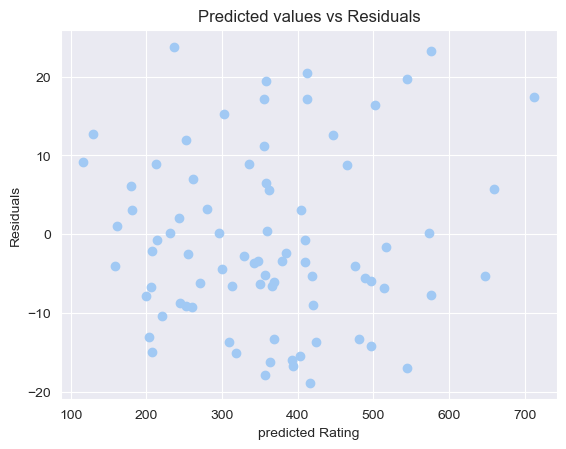

In [92]:
plt.scatter(y_pred,errors)
plt.xlabel("predicted Rating")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**Normality of Residuals**

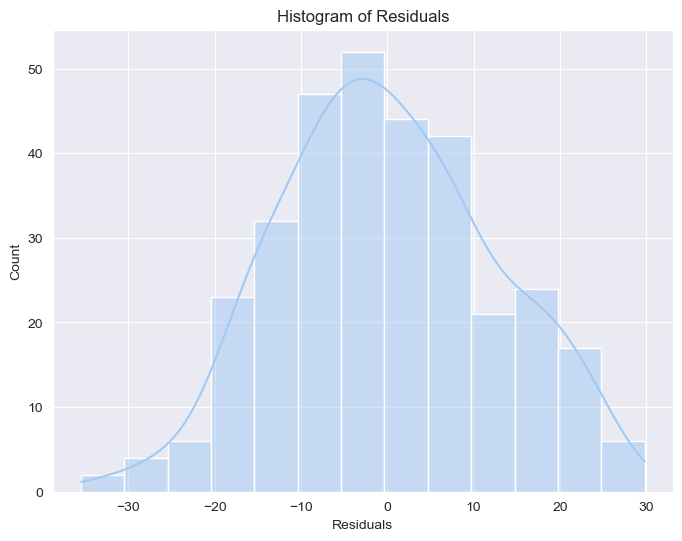

<Figure size 800x600 with 0 Axes>

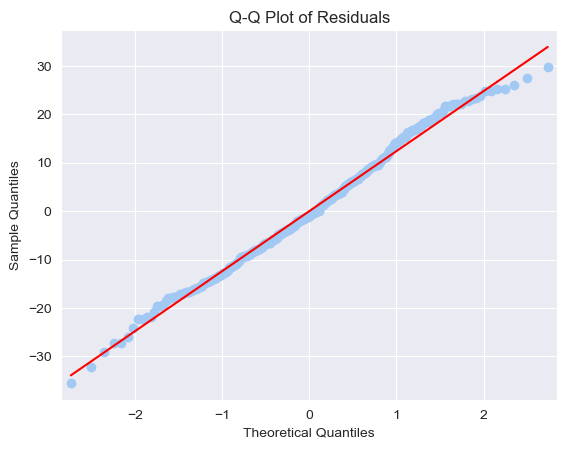

In [93]:
# Calculate residuals
residuals = sm_model2.resid

# Visualize residuals using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Visualize residuals using a Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [94]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality of residuals
stat, p_value = shapiro(residuals)

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check if the residuals are normally distributed based on the p-value
if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9922449588775635
P-value: 0.09389637410640717
Residuals are normally distributed.


### **C. Model Evaluation**

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have y_true (actual target values) and y_pred (predicted values) from your linear regression model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate the number of samples and number of predictors
n_samples, n_predictors = X.shape

# Calculate Adjusted R-squared (Adj R2)
adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1))

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)


Mean Squared Error (MSE): 118.75419444874964
Root Mean Squared Error (RMSE): 10.897439811659876
Mean Absolute Error (MAE): 9.025994110133665
R-squared (R2): 0.9927479613954032
Adjusted R-squared (Adj R2): 0.9927114271958838


## **Model-3**

### **A. Model Building**

- Let's see how the model performs if we select predictor features as `Income` and `Limit`

##### **Multicollinearity Check**

- Checking features `Income`, `Limit` for multicollinearity

In [96]:
df[['Income', 'Limit']].corr()

,Income,Limit
Income,1.000000,0.792088
Limit,0.792088,1.000000


In [97]:
df_model = df[['Income', 'Limit',]]

**Calculating VIF**

In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
vif = pd.DataFrame()
vif['Features'] = df_model.columns
vif['VIF'] = [variance_inflation_factor(df_model.values, i) for i in range(df_model.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Income,6.71
1,Limit,6.71


**Defining X and Y**

In [100]:
X = df[['Income', 'Limit']]
Y = df['Rating']

In [101]:
X.shape, Y.shape

((400, 2), (400,))

In [102]:
X_sm = sm.add_constant(X)


**Creating train and test data**

In [103]:
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Creating train and validation data**

In [104]:
X_train, X_val, y_train, y_val = train_test_split(X_sm, Y, test_size=0.2, random_state=42)

**Training Model**

In [105]:
sm_model3 = sm.OLS(y_train, X_train).fit()
sm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.615e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:29   Log-Likelihood:                -1261.2
No. Observations:                 320   AIC:                             2528.
Df Residuals:                     317   BIC:                             2540.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1064      1.588     24.621      0.000      35.981      42.231
Income         0.0264      0.033      0.790      0.430      -0.039       0.092
Limit          0.0665      0.000    135.126      0.000       0.066       0.067
==============================================================================
Omnibus:                        4.919   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                3.374
Skew:                           0.082   Prob(JB):                        0.185
Kurtosis:                       2.524   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Testing Model**

In [106]:
# Make predictions on the test data
y_pred = sm_model3.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model3.summary())

Mean Squared Error (MSE): 122.62037819290444
R-squared (R²): 0.9925118626715205
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.615e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:29   Log-Likelihood:                -1261.2
No. Observations:                 320   AIC:                             2528.
Df Residuals:                     317   BIC:                             2540.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

**Testing model with Validation data**

In [107]:
y_pred = sm_model3.predict(X_val)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print(sm_model3.summary())

Mean Squared Error (MSE): 122.62037819290444
R-squared (R²): 0.9925118626715205
                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.615e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:29   Log-Likelihood:                -1261.2
No. Observations:                 320   AIC:                             2528.
Df Residuals:                     317   BIC:                             2540.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### **B. Verifying Assumptions**

**Heteroscedasticity**

In [108]:
errors = y_test - y_pred
y_pred

210    651.864774
281    394.155362
34     161.537592
211    252.908406
94     400.892443
          ...    
247    253.109951
228    414.127621
370    574.748519
177    213.070337
290    299.153370
Length: 80, dtype: float64

Text(0.5, 1.0, 'Predicted values vs Residuals')

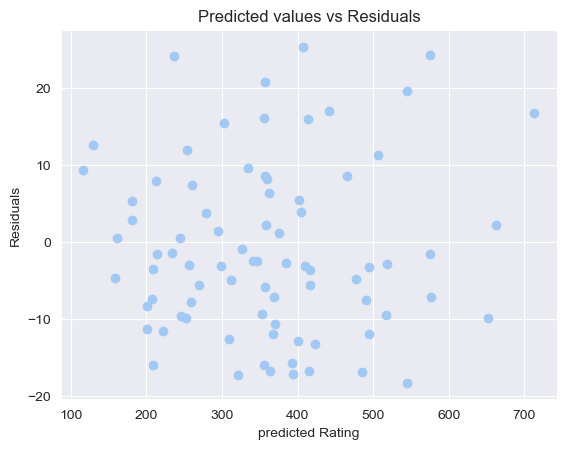

In [109]:
plt.scatter(y_pred,errors)
plt.xlabel("predicted Rating")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**Normality of Residuals**

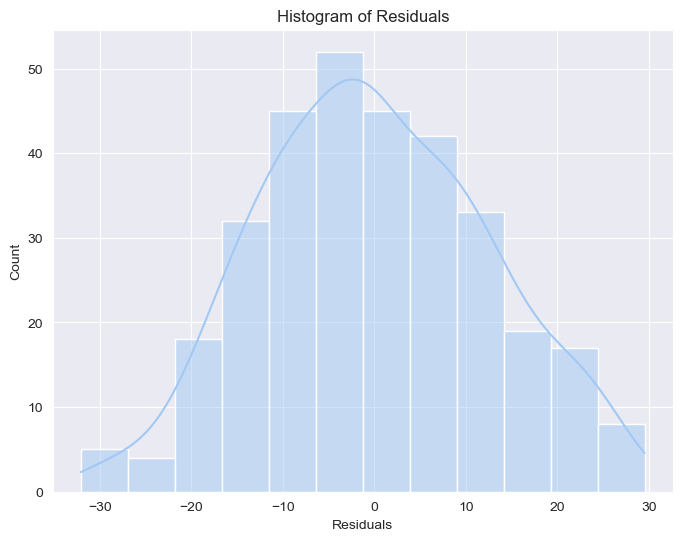

<Figure size 800x600 with 0 Axes>

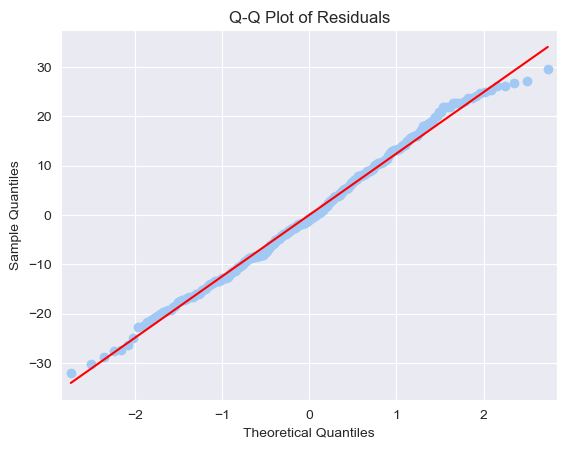

In [110]:
# Calculate residuals
residuals = sm_model3.resid

# Visualize residuals using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.show()

# Visualize residuals using a Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [111]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality of residuals
stat, p_value = shapiro(residuals)

# Print the test statistic and p-value
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Check if the residuals are normally distributed based on the p-value
if p_value > 0.05:
    print("Residuals are normally distributed.")
else:
    print("Residuals are not normally distributed.")

Shapiro-Wilk Test Statistic: 0.9925272464752197
P-value: 0.10938028991222382
Residuals are normally distributed.


### **C. Model Evaluation**

In [112]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have y_true (actual target values) and y_pred (predicted values) from your linear regression model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

# Calculate the number of samples and number of predictors
n_samples, n_predictors = X.shape

# Calculate Adjusted R-squared (Adj R2)
adj_r2 = 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_predictors - 1))

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("Adjusted R-squared (Adj R2):", adj_r2)


Mean Squared Error (MSE): 122.62037819290444
Root Mean Squared Error (RMSE): 11.073408607691873
Mean Absolute Error (MAE): 9.181349705141713
R-squared (R2): 0.9925118626715205
Adjusted R-squared (Adj R2): 0.9924741390577749


## **Comments**
- Model 2 performs much better than Model 1 and almost similarly to Model 3
- In Model 1 assumptions of Normality of Residuals and Heteroskedasticity are violated
- Model 2 and Model 3 follow all the assumptions of a Linear Regression Model
- Since Model 2 is Marginally better than Model 3 we'll select `Model 3` to push to production

# <u>***4. Insights and Recommendations***

In [113]:
sm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.636e+04
Date:                Wed, 02 Aug 2023   Prob (F-statistic):               0.00
Time:                        13:39:30   Log-Likelihood:                -1259.9
No. Observations:                 320   AIC:                             2526.
Df Residuals:                     317   BIC:                             2537.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4820      1.797     22.523      0.000      36.946      44.018
Limit          0.0658      0.001    107.796      0.000       0.065       0.067
Balance        0.0056      0.003      1.794      0.074      -0.001       0.012
==============================================================================
Omnibus:                        3.366   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                2.567
Skew:                           0.072   Prob(JB):                        0.277
Kurtosis:                       2.585   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## **Overview**

* The objective of the model was to predict the Credit Rating of a customer
* To achieve this objective a Linear Regression Model was built
* `Limit` and `Balance` were the predictor features in the final Model

## **Coefficients and Significance**
- The coefficient of predictor variable `Limit` is positive (0.0658), indicating an increase in Income associated with with a higher predicted Credit Rating. This coefficient is statistically significant (p-value < 0.05), suggesting a strong relationship.

- For each additional unit increase in Income, the predicted credit rating is expected to increase by 0.0658 points

- The coefficient of predictor variable `Balance` is positive (0.0056), indicating an increase in Credit Limit associated with with a higher predicted Credit Rating. This coefficient is statistically significant (p-value < 0.05), suggesting a strong relationship.

- For each additional unit increase in Limit, the predicted credit rating is expected to increase by 0.0056 points

- Credit Rating will be affected more by Credit Limit than Balance. It is not to say that Balance is not an important feature in predicting Credit Rating.

## **Model Performance**

- <u>Metric Scores</u>
    - *Mean Squared Error (MSE):* 118.75
    - *Root Mean Squared Error (RMSE):* 10.89
    - *Mean Absolute Error (MAE):* 9.025
    - *R-squared (R2):* 0.99
    - *Adjusted R-squared (Adj R2):* 0.99
    
    
* **The scores indicate high accuracy of the model with good performance on prediction**

## **Insights**

- Higher Credit Limits are positively correlated with higher credit ratings. Individuals with higher credit limits tend to have better credit ratings.

- The Balance variable doesn't appear to have a significant impact on credit ratings, as its coefficient is close to zero and not statistically significant.

## **Recommendations**
- Financial institutions may consider offering higher credit limits to customers who meet specific creditworthiness criteria, as this could potentially lead to improved credit ratings.

- While Balance does not seem to have a significant impact on credit ratings in this model, it's still important for customers to manage their balances responsibly to maintain good credit standing.
- Optimal Credit Utilization: Encourage borrowers to maintain a healthy credit utilization ratio by responsibly using their available credit. This can positively impact their credit ratings. Provide educational materials on how to manage credit limits effectively to avoid overutilization.

- Credit Counseling: Offer credit counseling services to individuals with high balances and low credit ratings. Providing guidance on debt reduction strategies and budgeting can help them improve their credit scores over time.

- Credit Limit Reviews: Periodically review and adjust credit limits for existing customers based on their creditworthiness and financial behavior. Responsible credit utilization can contribute to a positive credit rating.

## **Model Limitations**

- The model may not capture all factors that influence credit ratings, such as payment history and employment status. Further analysis and additional variables could enhance the predictive power.

- The linear regression assumption of linearity may not hold perfectly for the relationship between predictors and credit ratings. Exploring other modeling techniques like polynomial regression could be considered.